In [83]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [229]:
Kb_T=4.1 #pN⋅nm
dt=1.0 #s
k10=(6.01-0.24) #s^-1
k20=(0.007) #s^-1
k12=0.21 #s^-1
k21=0.105 #s^-1
x10=(1.3+0.6)*1e-1 #nm
x20=(1.76)*1e-1 #nm
x12=8.58*1e-1 #nm
x21=-4.2*1e-1 #nm
fuerzas=arange(0,100)
repeticiones=arange(0,8000)

In [230]:
def rata_de_salida(estado,f):
    if (estado==1.0):
        respuesta=k10*exp(x10*f/(Kb_T))*dt   
    elif (estado==2.0):
        respuesta=k20*exp(x20*f/(Kb_T))*dt  
    return respuesta        
def rata_de_cambio(estado, f):
    if (estado==2.0):
        respuesta=k21*exp(x21*f/(Kb_T))*dt            
    elif (estado==1.0):
        respuesta=k12*exp(x12*f/(Kb_T))*dt   
    return respuesta

In [231]:
tiempo_promedio=[]
for j in fuerzas:
    f=j*2.0 #pN
    t_gillepie=0
    for k in repeticiones:
        estado=1.0
        boleano=True 
        while(boleano):
            ktot=rata_de_cambio(estado,f)+rata_de_salida(estado, f)
            koff=rata_de_salida(estado,f)/ktot
            kon=rata_de_cambio(estado,f)/ktot
            p=random.uniform()  
            if(p<kon):
                if(estado ==2.0):
                    estado=1.0
                elif(estado ==1.0):
                    estado=2.0    
            else:    
                boleano=False
            c=random.exponential(1/ktot)
            t_gillepie=t_gillepie+c  
    tiempo_promedio.append(t_gillepie/len(repeticiones))

In [232]:
tiempo_promedio_solo_1=[]
for j in fuerzas:
    f=j*2.0 #pN
    t_gillepie=0
    for k in repeticiones:
        estado=1.0
        ktot=rata_de_salida(estado, f)
        c=random.exponential(1/ktot)
        t_gillepie=t_gillepie+c  
    tiempo_promedio_solo_1.append(t_gillepie/len(repeticiones))

In [233]:
tiempo_promedio_solo_2=[]
for j in fuerzas:
    f=j*2.0 #pN
    t_gillepie=0
    for k in repeticiones:
        estado=2.0
        ktot=rata_de_salida(estado, f)
        c=random.exponential(1/ktot)
        t_gillepie=t_gillepie+c  
    tiempo_promedio_solo_2.append(t_gillepie/len(repeticiones))

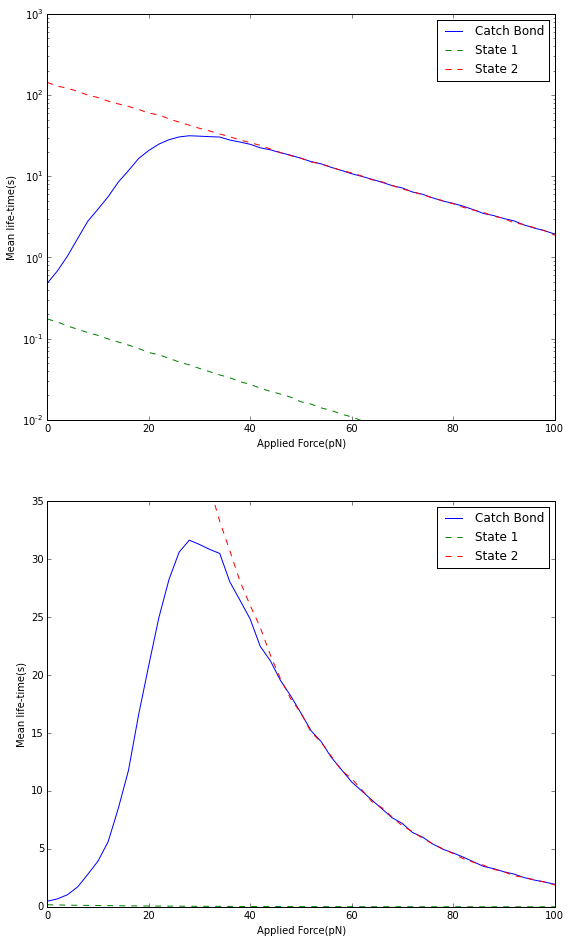

In [243]:
pylab.rcParams['figure.figsize'] = (20, 16)
fig = plt.figure()

plt.subplot(221)
semilogy(fuerzas*2.0,(array(tiempo_promedio)*dt),label="Catch Bond")
plot(fuerzas*2.0,(array(tiempo_promedio_solo_1)*dt),linestyle='--',label="State 1")
plot(fuerzas*2.0,(array(tiempo_promedio_solo_2)*dt),linestyle='--',label="State 2")
xlabel("Applied Force(pN)")
ylabel("Mean life-time(s)")
ylim(0.01)
xlim(0,100)
plt.legend()

plt.subplot(223)
plot(fuerzas*2.0,(array(tiempo_promedio)*dt),label="Catch Bond")
plot(fuerzas*2.0,(array(tiempo_promedio_solo_1)*dt),linestyle='--',label="State 1")
plot(fuerzas*2.0,(array(tiempo_promedio_solo_2)*dt),linestyle='--',label="State 2")
xlabel("Applied Force(pN)")
ylabel("Mean life-time(s)")
plt.legend()
xlim(0,100)
ylim(0,35)
savefig('grafica-catch-bond.png')